<a href="https://colab.research.google.com/github/OrestisGeo/MSc_MachineLearning/blob/Exercise_5/ML_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Exercise 5**

Question 1:

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# test print
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Question 2:

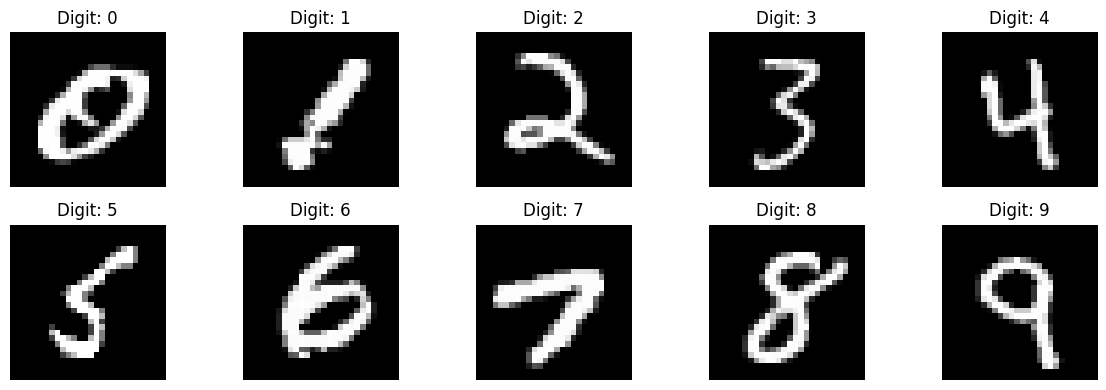

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 4))

# Choose random digits [0-9]
for digit in range(10):
    # Find all relevant indices
    indices = np.where(y_train == digit)[0]

    # Pick 1 at random
    random_index = np.random.choice(indices)
    image = x_train[random_index]

    # Plot
    plt.subplot(2, 5, digit + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Digit: {digit}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [5]:
print(x_train.shape)

(60000, 28, 28)


Question 3:

In [ ]:
Οι εικόνες των ψηφίων έχουν μέγεθος 28x28. Tα μαύρα pixel περιμετρικά των αριθμών δεν είναι τόσο σημαντικά γιατί είναι κοινά σε όλες τις εικόνες και επομένως δεν βοηθάνε στο να ξεχωρίσουμε τους αριθμούς μεταξύ τους.
Άρα τα κεντρικά pixel, ιδιαίτερα τα άσπρα είναι και τα πιο σημαντικά.

Question 4:

In [6]:
# Reshape images from 28x28 to vectors of size 784
x_train_flat = x_train.reshape(x_train.shape[0], 28*28)
x_test_flat = x_test.reshape(x_test.shape[0], 28*28)

print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


Question 5:

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reduce the dataset cause it was taking too long to run
N_train = 10000
N_test = 2000

x_train_sub = x_train_flat[:N_train]
y_train_sub = y_train[:N_train]
x_test_sub = x_test_flat[:N_test]
y_test_sub = y_test[:N_test]

print(x_train_sub.shape, y_train_sub.shape)
print(x_test_sub.shape, y_test_sub.shape)

(10000, 784) (10000,)
(2000, 784) (2000,)


k = 5: Train Acc = 0.9669, Test Acc = 0.9205
k = 15: Train Acc = 0.9459, Test Acc = 0.9055
k = 51: Train Acc = 0.9168, Test Acc = 0.8750
k = 100: Train Acc = 0.8936, Test Acc = 0.8535


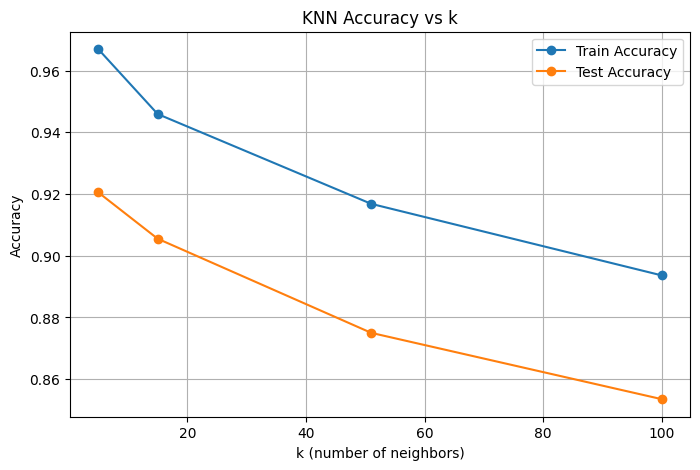

In [22]:

# Define values of k
N = x_train_sub.shape[0]
k_values = [5, 15, 51, int(np.sqrt(N))]

train_accuracies = []
test_accuracies = []

for k in k_values:
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(x_train_sub, y_train_sub)

    # Predictions
    y_pred_train = knn.predict(x_train_sub)
    y_pred_test = knn.predict(x_test_sub)

    # Compute accuracy
    train_acc = accuracy_score(y_train_sub, y_pred_train)
    test_acc = accuracy_score(y_test_sub, y_pred_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"k = {k}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

# ----- Create line plot -----
plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.legend()
plt.grid(True)
plt.show()

Question 6:

In [23]:
# Scale subset to [0, 1] (Use the reduced datasets)
x_train_sub_scaled = x_train_sub / 255.0
x_test_sub_scaled  = x_test_sub / 255.0

[Scaled] k = 5: Train Acc = 0.9669, Test Acc = 0.9205
[Scaled] k = 15: Train Acc = 0.9459, Test Acc = 0.9055
[Scaled] k = 51: Train Acc = 0.9168, Test Acc = 0.8750
[Scaled] k = 244: Train Acc = 0.8422, Test Acc = 0.7935


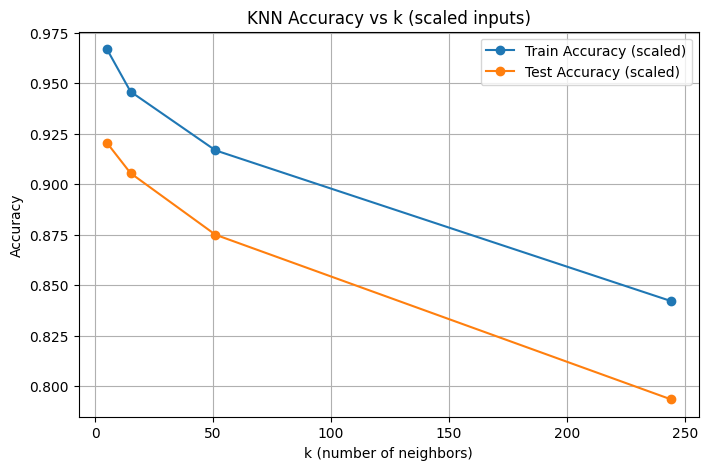

In [25]:

train_accuracies_scaled = []
test_accuracies_scaled = []

for k in k_values:
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on scaled data
    knn.fit(x_train_sub_scaled, y_train_sub)

    # Predictions
    y_pred_train = knn.predict(x_train_sub_scaled)
    y_pred_test = knn.predict(x_test_sub_scaled)

    # Compute accuracy
    train_acc = accuracy_score(y_train_sub, y_pred_train)
    test_acc = accuracy_score(y_test_sub, y_pred_test)

    train_accuracies_scaled.append(train_acc)
    test_accuracies_scaled.append(test_acc)

    print(f"[Scaled] k = {k}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

# Plot comparison for scaled data
plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies_scaled, marker='o', label='Train Accuracy (scaled)')
plt.plot(k_values, test_accuracies_scaled, marker='o', label='Test Accuracy (scaled)')
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k (scaled inputs)")
plt.legend()
plt.grid(True)
plt.show()

Χρησιμοποίησα ένα υποσύνολο του MNIST γιατί δεν μπορούσε να το τρέξει, δεν τελείωνε ποτέ το trai.

Question 7:

In [15]:
from google.colab import files

uploaded = files.upload()

Saving Digit 5.png to Digit 5 (2).png


In [16]:
from PIL import Image
img = Image.open(list(uploaded.keys())[0])


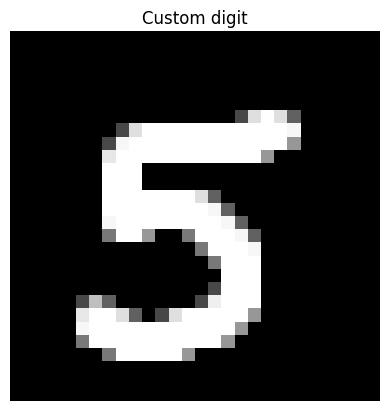

Image shape: (28, 28)


In [26]:
# Convert to grayscale
img_gray = img.convert("L")

# Resize to 28x28 if needed
img_gray = img_gray.resize((28, 28))

# Convert to numpy array
img_array = np.array(img_gray)

# Show the image to verify
plt.imshow(img_array, cmap="gray")
plt.title("Custom digit")
plt.axis("off")
plt.show()

print("Image shape:", img_array.shape)

In [27]:
# Scale pixel values to [0, 1]
img_scaled = img_array / 255.0

# Flatten to vector of size 784
img_flat = img_scaled.reshape(1, 28*28)

print("Flattened shape:", img_flat.shape)

Flattened shape: (1, 784)


In [29]:
# Choose best KNN
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(x_train_sub_scaled, y_train_sub)

KNeighborsClassifier()

In [30]:
# Predict the digit using the best KNN model
pred = best_knn.predict(img_flat)
print("Predicted digit:", pred[0])

Predicted digit: 5


Για k=5 το πρόβλεψε σωστά!

In [34]:
# Choose best KNN
test_knn = KNeighborsClassifier(n_neighbors=244)
test_knn.fit(x_train_sub_scaled, y_train_sub)
pred = test_knn.predict(img_flat)
print("Predicted digit:", pred[0])

Predicted digit: 5


Ακόμα και για k = 244 που είχε το μικρότερο accuracy πάλι το προβλέπει σωστά. Μάλλον επειδή ο αριθμός είναι αρκετά καλοσχηματισμένος. Θα δοκιμάσω και με άλλες εικόνες.